In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def RF4_method(f, alpha, omega, omega1, y0, y_dot0, time):
  
    t = len(time)
    dt = time[1] - time[0]

    y = np.zeros(t)
    y[0] = y0

    y_dot = np.zeros(t)
    y_dot[0] = y_dot0

    for i in range(t-1):
      f1 = y_dot[i]
      k1 = f * np.cos(omega1 * time[i]) - omega**2 * np.sin(y[i]) - alpha * y_dot[i]

      f2 = y_dot[i] + dt*k1/2
      k2 = f * np.cos(omega1 * (time[i] + dt/2)) - omega**2 * np.sin((y[i] + dt*f1/2)) - alpha * f2

      f3 = y_dot[i] + dt*k2/2
      k3 = f * np.cos(omega1 * (time[i] + dt/2)) - omega**2 * np.sin((y[i] + dt*f2/2)) - alpha * f3

      f4 = y_dot[i] + dt*k3/2
      k4 = f * np.cos(omega1 * (time[i] + dt/2)) - omega**2 * np.sin((y[i] + dt*f3/2)) - alpha * f4

      y[i+1] = y[i] + dt*(f1 + 2*f2 + 2*f3 + f4)/6
      y_dot[i+1] = y_dot[i] + dt*(k1 + 2*k2 + 2*k3 + k4)/6


    return y, y_dot

In [ ]:
ens = 100
teta0 = np.random.random(size = ens)
tetadot0 = np.random.random(size = ens)
len_t = 1000
teta = np.zeros((ens, len_t))
teta_dot = np.zeros((ens, len_t))
t = np.linspace(0,50, len_t)

for e in range(ens):
  teta[e], teta_dot[e] = RF4_method(.52, .2, 1, .666, teta0[e], tetadot0[e], t)


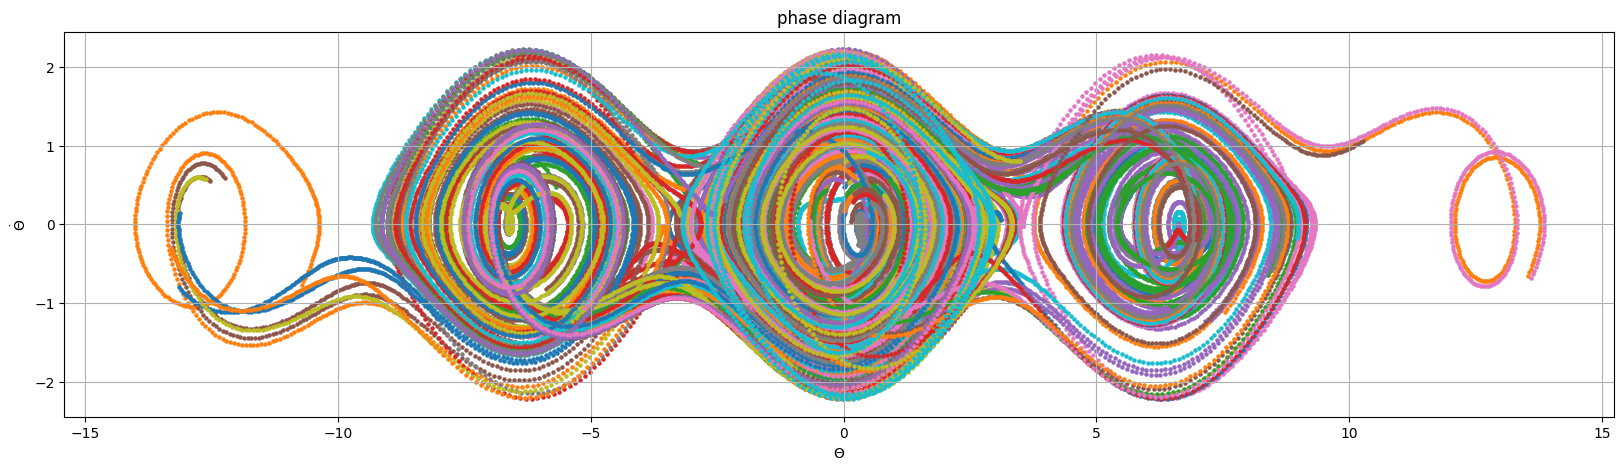

In [ ]:
plt.figure(figsize = (20,5))
plt.title('phase diagram')
plt.xlabel('${\Theta}$')
plt.ylabel('$\dot{\Theta}$')
plt.grid()

for e in range(ens):
  plt.scatter(teta[e], teta_dot[e], s=5)